In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [9]:
import pandas as pd

df = pd.read_csv(r'C:\Users\acer\Desktop\Missing Child\Missing child finder.v2i.tensorflow\train\_annotations.csv')
print(df.head())  


                                            filename  width  height class  \
0  IMG_20180201_142655_jpg.rf.7a0a01b5cbca502d863...    640     640  girl   
1  IMG_20160915_164648_jpg.rf.7a5c4f4b15fdbe29e2a...    640     640  girl   
2  IMG_20210528_022134_jpg.rf.7b66a593082bac2beb6...    640     640   boy   
3  IMG_20170829_142630355_jpg.rf.7bbe0743b308bba2...    640     640  girl   
4  IMG_20160922_120237_jpg.rf.7ba20230f6294abf959...    640     640  girl   

   xmin  ymin  xmax  ymax  
0   114   101   639   639  
1    29    96   630   640  
2   188    81   573   638  
3    25    50   521   638  
4    39     4   587   640  


In [3]:

# import cv2
# import pandas as pd
# import os


# image_dir = r"C:\Users\acer\Desktop\Missing Child\Missing child finder.v2i.tensorflow\train"

# for filename in df['filename']:
#     img_path = os.path.join(image_dir, filename)
#     img = cv2.imread(img_path)
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     cv2.imshow(f"Image: {filename}", img_rgb) 
#     cv2.waitKey(0)  
# cv2.destroyAllWindows()  

EDA

dowenloaded 764 images.


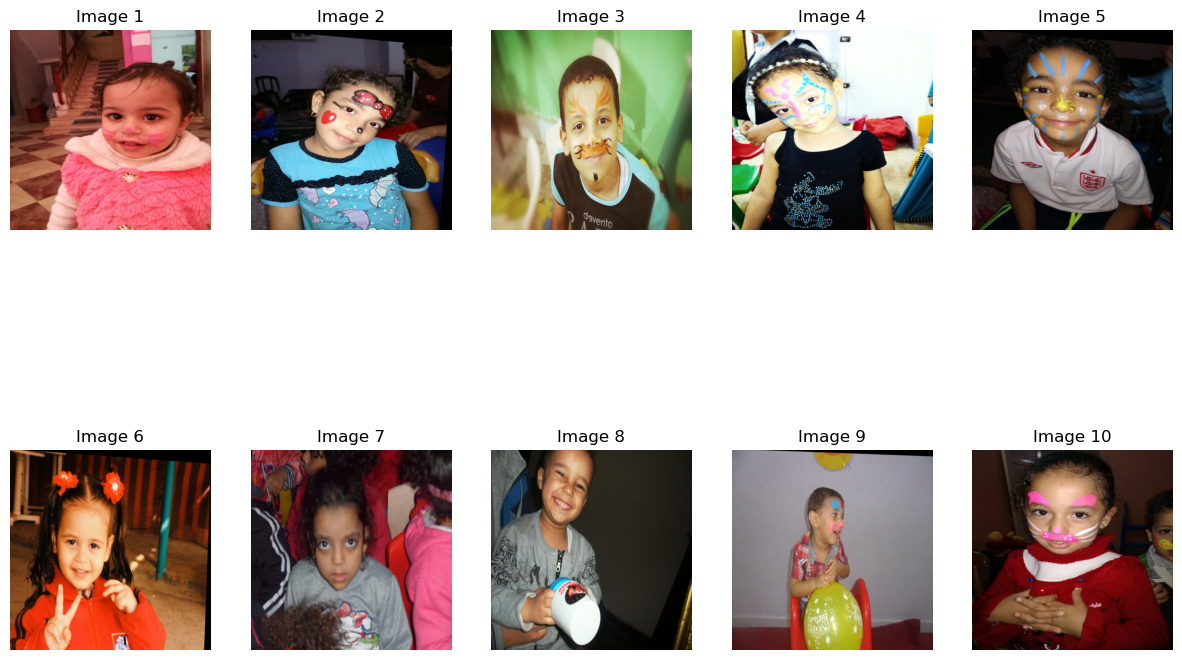

In [11]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
image_dir= r"C:\Users\acer\Desktop\Missing Child\Missing child finder.v2i.tensorflow\train"
def load_images(df, image_dir):
    images = []
    filenames = df['filename']  
    for filename in filenames:
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            images.append(img)
        else:
            print(f"الصورة {filename} مفقودة!")
    return np.array(images)


# تحميل جميع الصور
images = load_images(df, image_dir)
print(f"dowenloaded {len(images)} images.")

# عرض أول 10 صور (كمثال)
plt.figure(figsize=(15, 10))
for i in range(min(10, len(images))):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Image {i+1}")
    plt.axis('off')
plt.show()



In [8]:

print(df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  764 non-null    object
 1   width     764 non-null    int64 
 2   height    764 non-null    int64 
 3   class     764 non-null    object
 4   xmin      764 non-null    int64 
 5   ymin      764 non-null    int64 
 6   xmax      764 non-null    int64 
 7   ymax      764 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 47.9+ KB
None


In [9]:
print(df.describe()) 

       width  height        xmin        ymin        xmax       ymax
count  764.0   764.0  764.000000  764.000000  764.000000  764.00000
mean   640.0   640.0   95.577225   74.261780  537.497382  623.34555
std      0.0     0.0   87.403393   58.611228   79.749929   47.06189
min    640.0   640.0    0.000000    0.000000  313.000000  324.00000
25%    640.0   640.0    4.000000   28.000000  478.000000  635.00000
50%    640.0   640.0   91.500000   68.000000  539.500000  638.00000
75%    640.0   640.0  155.000000  112.000000  614.250000  640.00000
max    640.0   640.0  519.000000  365.000000  640.000000  640.00000


In [10]:
print(df.isnull().sum())  

filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64


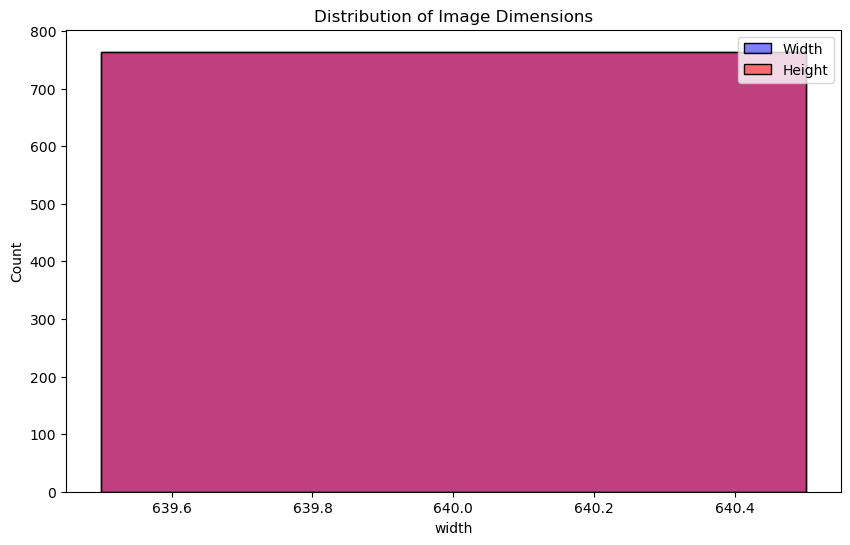

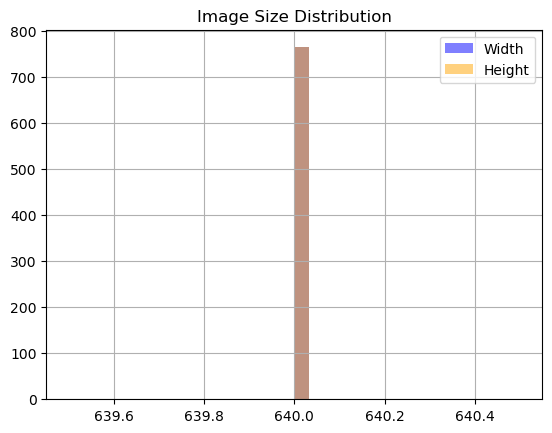

In [12]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['width'], kde=True, color='blue', label='Width')
sns.histplot(df['height'], kde=True, color='red', label='Height')
plt.legend()
plt.title('Distribution of Image Dimensions')
plt.show()
df['width'].hist(bins=30, alpha=0.5, color='blue', label='Width')
df['height'].hist(bins=30, alpha=0.5, color='orange', label='Height')
plt.legend()
plt.title('Image Size Distribution')
plt.show()


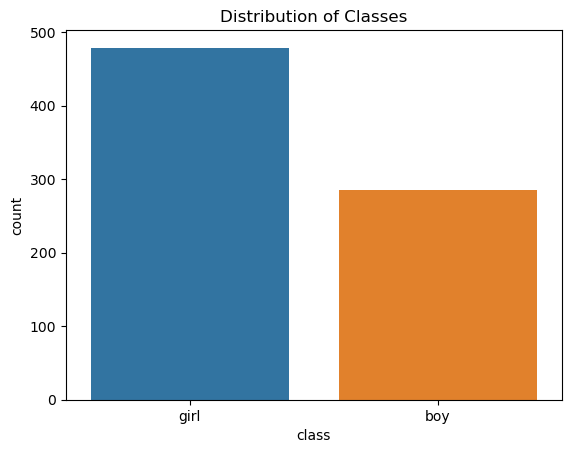

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.show()


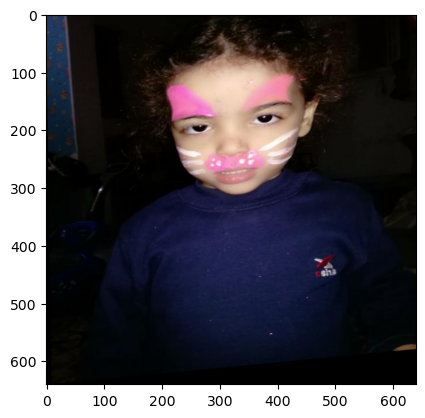

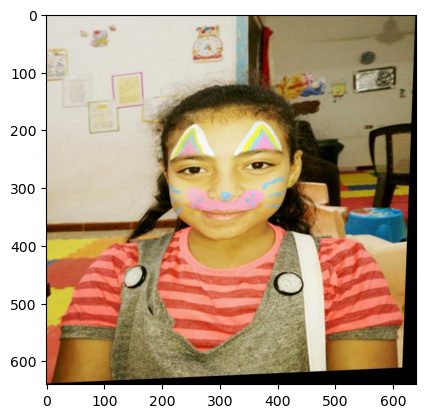

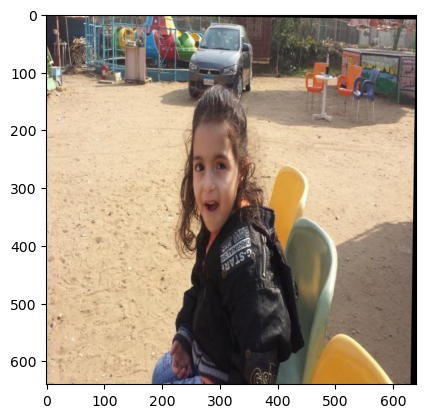

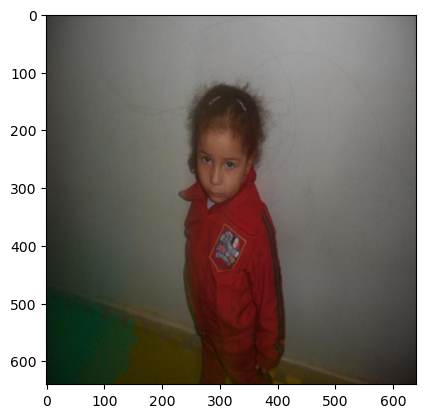

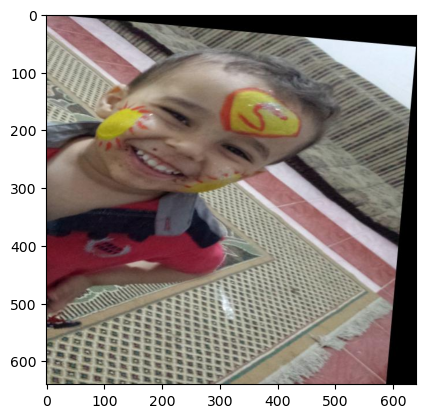

In [14]:
import random
sample_images = random.sample(df['filename'].tolist(), 5)
for filename in sample_images:
    img_path = os.path.join(image_dir, filename)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()


In [ ]:
pip install --upgrade keras tensorflow


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_dir = r"C:\Users\acer\Desktop\Missing Child\Missing child finder.v2i.tensorflow\train"

images = load_images(df, image_dir)  

def resize_image(img, size=(224, 224)):
    return cv2.resize(img, size)

# Normalize the images
images = images / 255.0

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

X = np.array(images)
Y = df['class'].values  

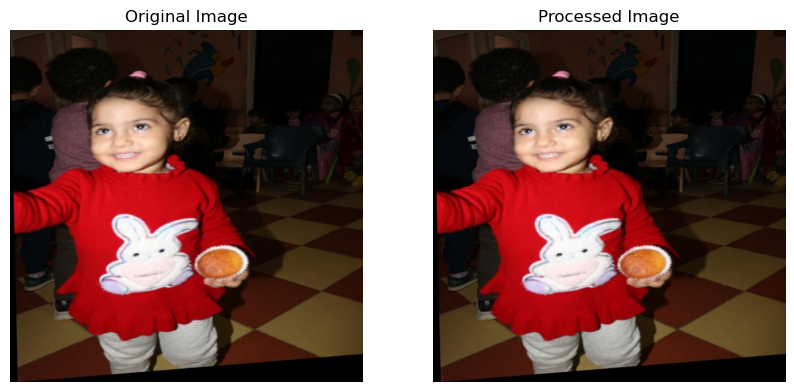

Original image stats: mean=51.53300537109375, std=67.77322246844588


In [17]:
img = cv2.imread(r"C:\Users\acer\Desktop\Missing Child\Missing child finder.v2i.tensorflow\train\20211201224237_IMG_8098_JPG.rf.cef1a9b05ffb7dcaba7156cdcf31a789.jpg")  # قراءة الصورة
if img is None:
    print(f"خطأ في تحميل الصورة: {img_path}")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # تحويل الصورة إلى RGB

# عرض الصورة الأصلية والمعالجة
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.show()

# إحصائيات الصورة
print(f"Original image stats: mean={np.mean(img_rgb)}, std={np.std(img_rgb)}")


In [12]:
import cv2
import numpy as np
import os

def load_images(df, image_dir, num_images=None):
    images = []
    filenames = df['filename'] if num_images is None else df['filename'][:num_images]  
    for filename in filenames:
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
            images.append(img)
        else:
            print(f"Error loading image: {filename}")
    return np.array(images)

# تحميل البيانات
images = load_images(df, image_dir)  # تحميل كل الصور
print(f"dowenloaded{len(images)} image.")

# التأكد من تطابق الأبعاد
assert len(images) == len(df), "عدد الصور لا يتطابق مع عدد التسميات"


dowenloaded764 image.


PREPARING FOR MODELLING

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X = images
Y = df['class'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, Y_train, batch_size=32)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow(X_test, Y_test, batch_size=32)


MODELLING

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

# إعداد النموذج
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:
from PIL import Image
try:
    img = Image.open(r"C:\Users\acer\Desktop\Missing Child\Missing child finder.v2i.tensorflow\train\20211201224237_IMG_8098_JPG.rf.cef1a9b05ffb7dcaba7156cdcf31a789.jpg")
    img.verify()  
except (IOError, SyntaxError) as e:
    print(f"صورة غير صالحة: {img_path}")


In [22]:
from PIL import Image
img = Image.open(r"C:\Users\acer\Desktop\Missing Child\Missing child finder.v2i.tensorflow\train\20211201224237_IMG_8098_JPG.rf.cef1a9b05ffb7dcaba7156cdcf31a789.jpg")
img = img.convert("RGB")  


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train"

# إعداد ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  
)

print("available classes:", train_generator.class_indices)


Found 1423 images belonging to 2 classes.
available classes: {'founded': 0, 'loss': 1}


In [34]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train"

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  
predictions = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))


Found 1423 images belonging to 2 classes.


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8864 - loss: 0.2177
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 1.0000 - loss: 8.8695e-04
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 1.0000 - loss: 4.5908e-04
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 1.0000 - loss: 2.6331e-04
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 1.0000 - loss: 1.4585e-04
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 1.0000 - loss: 8.6740e-05
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 1.0000 - loss: 6.1856e-05
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 1.0000 - loss: 3.8898e-05
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 1.0000 - loss: 3.0792e-05
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 1.0000 - loss: 2.5191e-05


In [66]:
import cv2
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def extract_features(image_paths):
    features = []
    win_size = (32, 32)
    block_size = (16, 16)
    block_stride = (8, 8)
    cell_size = (8, 8)
    nbins = 9
    
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    
    for img_path in image_paths:
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to read the image: {img_path}")
                continue
                
            if len(img.shape) == 3:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
            img = cv2.resize(img, win_size)
            feature = hog.compute(img)
            
            if feature is not None:
                features.append(feature.flatten())
            else:
                print(f"Failed to extract features from image: {img_path}")
                
        except Exception as e:
            print(f"An error occurred in processing the image {img_path}: {str(e)}")
            continue
            
    return np.array(features) if features else np.array([])

missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train'
non_missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/valid'  

missing_paths = [os.path.join(missing_dir, f) for f in os.listdir(missing_dir) 
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
non_missing_paths = [os.path.join(non_missing_dir, f) for f in os.listdir(non_missing_dir) 
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

all_paths = missing_paths + non_missing_paths

if not all_paths:
    print("No images were found in the specified folders")
    exit()

print("Extracting features from images...")
X = extract_features(all_paths)

if X.size == 0:
    print("Failed to extract features from images")
    exit()

y = np.array([1] * len(missing_paths) + [0] * len(non_missing_paths))

print("PCA is being applied...")
n_components = min(50, X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

print("Data is being split...")
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print("Training the model...")
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy:.2f}")

Extracting features from images...
PCA is being applied...
Data is being split...
Training the model...
Classification accuracy: 0.93


In [67]:
print(len(X), len(y))


1559 1559


In [73]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import cv2
from concurrent.futures import ThreadPoolExecutor
import pickle
from datetime import datetime

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

def load_and_preprocess_image(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32')
        img = preprocess_input(img)
        return img
    except Exception as e:
        print(f"خطأ في معالجة الصورة {img_path}: {str(e)}")
        return None

def process_batch(image_paths, model, batch_size=32):
    features = []
    valid_paths = []
    
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i + batch_size]
        batch_images = []
        
        with ThreadPoolExecutor() as executor:
            processed_images = list(executor.map(load_and_preprocess_image, batch_paths))
        
        current_valid_paths = []
        for img, path in zip(processed_images, batch_paths):
            if img is not None:
                batch_images.append(img)
                current_valid_paths.append(path)
        
        if batch_images:
            batch_images = np.array(batch_images)
            batch_features = model.predict(batch_images, verbose=0)
            features.extend(batch_features)
            valid_paths.extend(current_valid_paths)
            
        print(f"تمت معالجة {len(valid_paths)} صورة من أصل {len(image_paths)}", end='\r')
    
    return np.array(features), valid_paths

def save_features(features, paths, filename):
    with open(filename, 'wb') as f:
        pickle.dump({'features': features, 'paths': paths}, f)

def load_features(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data['features'], data['paths']

def main():
    start_time = datetime.now()
    print("بدء التنفيذ:", start_time)
    
    print("جاري تحميل نموذج ResNet50...")
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    
    missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train'
    non_missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/valid'
    
    cache_file = 'cached_features.pkl'
    if os.path.exists(cache_file):
        print("جاري تحميل الميزات المخزنة...")
        X, all_paths = load_features(cache_file)
        y = np.array([1] * len([p for p in all_paths if 'train' in p]) +
                     [0] * len([p for p in all_paths if 'valid' in p]))
    else:
        missing_paths = [os.path.join(missing_dir, f) for f in os.listdir(missing_dir) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        non_missing_paths = [os.path.join(non_missing_dir, f) for f in os.listdir(non_missing_dir) 
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        print("\nجاري معالجة الصور المفقودة...")
        missing_features, valid_missing_paths = process_batch(missing_paths, base_model)
        
        print("\nجاري معالجة الصور غير المفقودة...")
        non_missing_features, valid_non_missing_paths = process_batch(non_missing_paths, base_model)
        
        X = np.vstack([missing_features, non_missing_features])
        y = np.array([1] * len(valid_missing_paths) + [0] * len(valid_non_missing_paths))
        
        save_features(X, valid_missing_paths + valid_non_missing_paths, cache_file)
    
    print("\nجاري تدريب نموذج SVM...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nدقة النموذج: {accuracy:.2f}")
    print("\nتقرير التصنيف:")
    print(classification_report(y_test, y_pred, target_names=['غير مفقود', 'مفقود']))
    
    end_time = datetime.now()
    print(f"\nوقت التنفيذ الكلي: {end_time - start_time}")
    
    return base_model, svm

if __name__ == "__main__":
    resnet_model, svm_model = main()
    
    def predict_new_image(image_path, resnet_model, svm_model):
        img = load_and_preprocess_image(image_path)
        if img is not None:
            img = np.expand_dims(img, axis=0)
            features = resnet_model.predict(img, verbose=0)
            prediction = svm_model.predict(features)
            probability = svm_model.predict_proba(features)
            return prediction[0], probability[0]
        return None, None

بدء التنفيذ: 2025-01-06 09:14:49.414029
جاري تحميل نموذج ResNet50...

جاري معالجة الصور المفقودة...
تمت معالجة 1423 صورة من أصل 1423
جاري معالجة الصور غير المفقودة...
تمت معالجة 136 صورة من أصل 136
جاري تدريب نموذج SVM...

دقة النموذج: 0.90

تقرير التصنيف:
              precision    recall  f1-score   support

   غير مفقود       0.32      0.35      0.33        23
       مفقود       0.95      0.94      0.94       289

    accuracy                           0.90       312
   macro avg       0.63      0.64      0.64       312
weighted avg       0.90      0.90      0.90       312


وقت التنفيذ الكلي: 0:02:00.178254


In [77]:
pip install torch torchvision


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/69/55/ce836703ff77bb21582c3098d5311f8ddde7eadc7eab04be9561961f4725/torchvision-0.20.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.1 MB 1.7 MB/s eta 0:02:03

In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import cv2
from concurrent.futures import ThreadPoolExecutor
import pickle
from datetime import datetime
from scipy.stats import uniform, randint

# تكوين GPU مع mixed precision للتسريع
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    # تفعيل mixed precision
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

def load_and_preprocess_image(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32')
        img = preprocess_input(img)
        return img
    except Exception as e:
        print(f"خطأ في معالجة الصورة {img_path}: {str(e)}")
        return None

def process_batch(image_paths, model, batch_size=64):  # زيادة حجم الدفعة
    features = []
    valid_paths = []
    
    # تقسيم المسارات إلى مجموعات للمعالجة المتوازية
    num_batches = (len(image_paths) + batch_size - 1) // batch_size
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(image_paths))
        batch_paths = image_paths[start_idx:end_idx]
        
        # معالجة متوازية للصور
        with ThreadPoolExecutor(max_workers=8) as executor:  # زيادة عدد العمال
            processed_images = list(executor.map(load_and_preprocess_image, batch_paths))
        
        # تجميع الصور الصالحة
        batch_images = []
        current_valid_paths = []
        for img, path in zip(processed_images, batch_paths):
            if img is not None:
                batch_images.append(img)
                current_valid_paths.append(path)
        
        if batch_images:
            batch_images = np.array(batch_images)
            # استخدام predict_on_batch بدلاً من predict للسرعة
            batch_features = model(batch_images, training=False).numpy()
            features.extend(batch_features)
            valid_paths.extend(current_valid_paths)
        
        print(f"تمت معالجة {len(valid_paths)} صورة من أصل {len(image_paths)}", end='\r')
    
    return np.array(features), valid_paths

def perform_randomized_search(X_train, y_train):
    # تحديد نطاق المعاملات بشكل أكثر كفاءة
    param_distributions = {
        'C': uniform(0.1, 100),
        'kernel': ['linear', 'rbf'],  # تقليل خيارات النواة
        'gamma': uniform(0.001, 0.1),
        'class_weight': [None, 'balanced']
    }
    
    # إنشاء نموذج RandomizedSearchCV
    svm = SVC(probability=True, random_state=42)
    random_search = RandomizedSearchCV(
        svm,
        param_distributions,
        n_iter=10,  # عدد التجارب العشوائية
        cv=3,  # تقليل عدد الـ folds
        scoring='accuracy',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    
    print("جاري البحث عن أفضل المعاملات...")
    random_search.fit(X_train, y_train)
    
    print("\nأفضل المعاملات:")
    print(random_search.best_params_)
    print(f"\nأفضل نتيجة: {random_search.best_score_:.4f}")
    
    return random_search.best_estimator_

def main():
    start_time = datetime.now()
    print("بدء التنفيذ:", start_time)
    
    # تحميل نموذج ResNet50
    print("جاري تحميل نموذج ResNet50...")
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    
    # تحديد المسارات
    missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train'
    non_missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/valid'
    
    # التحقق من وجود ميزات مخزنة مسبقاً
    cache_file = 'cached_features.pkl'
    if os.path.exists(cache_file):
        print("جاري تحميل الميزات المخزنة...")
        X, all_paths = load_features(cache_file)
        y = np.array([1] * len([p for p in all_paths if 'train' in p]) +
                     [0] * len([p for p in all_paths if 'valid' in p]))
    else:
        missing_paths = [os.path.join(missing_dir, f) for f in os.listdir(missing_dir) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        non_missing_paths = [os.path.join(non_missing_dir, f) for f in os.listdir(non_missing_dir) 
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        print("\nجاري معالجة الصور المفقودة...")
        missing_features, valid_missing_paths = process_batch(missing_paths, base_model)
        
        print("\nجاري معالجة الصور غير المفقودة...")
        non_missing_features, valid_non_missing_paths = process_batch(non_missing_paths, base_model)
        
        X = np.vstack([missing_features, non_missing_features])
        y = np.array([1] * len(valid_missing_paths) + [0] * len(valid_non_missing_paths))
        
        save_features(X, valid_missing_paths + valid_non_missing_paths, cache_file)
    
    # تقسيم البيانات وتطبيعها
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # البحث العشوائي عن أفضل المعاملات
    best_svm = perform_randomized_search(X_train_scaled, y_train)
    
    # التقييم
    y_pred = best_svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nدقة النموذج النهائية: {accuracy:.4f}")
    print("\nتقرير التصنيف:")
    print(classification_report(y_test, y_pred, target_names=['غير مفقود', 'مفقود']))
    
    end_time = datetime.now()
    print(f"\nوقت التنفيذ الكلي: {end_time - start_time}")
    
    return base_model, best_svm, scaler

if __name__ == "__main__":
    resnet_model, svm_model, scaler = main()
    
    def predict_new_image(image_path, resnet_model, svm_model, scaler):
        img = load_and_preprocess_image(image_path)
        if img is not None:
            img = np.expand_dims(img, axis=0)
            features = resnet_model(img, training=False).numpy()
            features_scaled = scaler.transform(features)
            prediction = svm_model.predict(features_scaled)
            probability = svm_model.predict_proba(features_scaled)
            return prediction[0], probability[0]
        return None, None

بدء التنفيذ: 2025-01-06 10:07:29.895983
جاري تحميل نموذج ResNet50...
جاري تحميل الميزات المخزنة...
جاري البحث عن أفضل المعاملات...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

أفضل المعاملات:
{'C': 37.55401188473625, 'class_weight': None, 'gamma': 0.01934347898661638, 'kernel': 'rbf'}

أفضل نتيجة: 0.9094

دقة النموذج النهائية: 0.9263

تقرير التصنيف:
              precision    recall  f1-score   support

   غير مفقود       0.00      0.00      0.00        23
       مفقود       0.93      1.00      0.96       289

    accuracy                           0.93       312
   macro avg       0.46      0.50      0.48       312
weighted avg       0.86      0.93      0.89       312


وقت التنفيذ الكلي: 0:01:04.415147


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import tensorflow as tf

def plot_confusion_matrix(y_true, y_pred, title):
    """
    Plot confusion matrix for model evaluation
    
    Args:
        y_true: Ground truth labels
        y_pred: Predicted labels
        title: Title for the plot
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Missing', 'Missing'],
                yticklabels=['Not Missing', 'Missing'])
    plt.title(f'Confusion Matrix - {title}', pad=20, size=14)
    plt.ylabel('True Label', size=12)
    plt.xlabel('Predicted Label', size=12)
    
    # Save the plot
    plt.savefig(f'confusion_matrix_{title.lower().replace(" ", "_")}.png', 
                bbox_inches='tight', dpi=300)
    plt.close()

def plot_roc_curve(y_true, y_pred_prob, title):
    """
    Plot ROC curve for model evaluation
    
    Args:
        y_true: Ground truth labels
        y_pred_prob: Predicted probabilities
        title: Title for the plot
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=12)
    plt.ylabel('True Positive Rate', size=12)
    plt.title(f'ROC Curve - {title}', pad=20, size=14)
    plt.legend(loc="lower right", fontsize=10)
    
    # Save the plot
    plt.savefig(f'roc_curve_{title.lower().replace(" ", "_")}.png', 
                bbox_inches='tight', dpi=300)
    plt.close()

def evaluate_model(model, X_test, y_test, model_type="SVM"):
    """
    Evaluate model performance and create visualization plots
    
    Args:
        model: Trained model (SVM or Deep Learning)
        X_test: Test features
        y_test: Test labels
        model_type: Type of model ("SVM" or "Deep Learning")
        
    Returns:
        dict: Dictionary containing model performance metrics
    """
    print(f"\n=== Evaluating {model_type} Model ===")
    
    # Get predictions
    if model_type == "Deep Learning":
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Create visualization plots
    plot_confusion_matrix(y_test, y_pred, f"{model_type} Model")
    plot_roc_curve(y_test, y_pred_prob, f"{model_type} Model")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

def compare_models_performance(results_dict):
    """
    Create comparative visualization of model performances
    
    Args:
        results_dict: Dictionary containing results for each model
    """
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    models = list(results_dict.keys())
    
    # Prepare data for plotting
    data = []
    for model in models:
        data.append([
            results_dict[model]['accuracy'],
            results_dict[model]['precision'],
            results_dict[model]['recall'],
            results_dict[model]['f1']
        ])
    
    # Create bar plot
    plt.figure(figsize=(12, 8))
    x = np.arange(len(metrics))
    width = 0.25
    
    for i, model_data in enumerate(data):
        plt.bar(x + i*width, model_data, width, label=models[i])
    
    plt.xlabel('Metrics', size=12)
    plt.ylabel('Score', size=12)
    plt.title('Model Comparison', pad=20, size=14)
    plt.xticks(x + width, metrics)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Save the plot
    plt.savefig('model_comparison.png', bbox_inches='tight', dpi=300)
    plt.close()

def run_evaluation(svm_model, deep_model, X_test, y_test):
    """
    Run complete evaluation for all models
    
    Args:
        svm_model: Trained SVM model
        deep_model: Trained Deep Learning model (or None)
        X_test: Test features
        y_test: Test labels
        
    Returns:
        dict: Dictionary containing results for all models
    """
    results = {}
    
    # Evaluate SVM model
    results['SVM'] = evaluate_model(svm_model, X_test, y_test, "SVM")
    
    # Evaluate Deep Learning model if provided
    if deep_model is not None:
        results['Deep Learning'] = evaluate_model(deep_model, X_test, y_test, "Deep Learning")
    
    # Create comparison plot
    compare_models_performance(results)
    
    return results

# Usage example:
"""
# Assuming you have the following:
# svm_model = your_trained_svm_model
# deep_model = load_model('path_to_your_model.h5')  # or None if not using deep learning
# X_test = your_test_data
# y_test = your_test_labels

results = run_evaluation(svm_model, deep_model, X_test, y_test)

# All plots will be automatically saved in the current working directory:
# - confusion_matrix_svm_model.png
# - roc_curve_svm_model.png
# - confusion_matrix_deep_learning_model.png (if deep_model provided)
# - roc_curve_deep_learning_model.png (if deep_model provided)
# - model_comparison.png
"""

"\n# Assuming you have the following:\n# svm_model = your_trained_svm_model\n# deep_model = load_model('path_to_your_model.h5')  # or None if not using deep learning\n# X_test = your_test_data\n# y_test = your_test_labels\n\nresults = run_evaluation(svm_model, deep_model, X_test, y_test)\n\n# All plots will be automatically saved in the current working directory:\n# - confusion_matrix_svm_model.png\n# - roc_curve_svm_model.png\n# - confusion_matrix_deep_learning_model.png (if deep_model provided)\n# - roc_curve_deep_learning_model.png (if deep_model provided)\n# - model_comparison.png\n"

In [3]:
pip install tensorflow opencv-python scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from concurrent.futures import ThreadPoolExecutor
import pickle
from datetime import datetime
from scipy.stats import uniform

# === Visualization Functions ===
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Missing', 'Missing'],
                yticklabels=['Not Missing', 'Missing'])
    plt.title(f'Confusion Matrix - {title}', pad=20, size=14)
    plt.ylabel('True Label', size=12)
    plt.xlabel('Predicted Label', size=12)
    plt.savefig(f'confusion_matrix_{title.lower().replace(" ", "_")}.png', 
                bbox_inches='tight', dpi=300)
    plt.close()

def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=12)
    plt.ylabel('True Positive Rate', size=12)
    plt.title(f'ROC Curve - {title}', pad=20, size=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.savefig(f'roc_curve_{title.lower().replace(" ", "_")}.png', 
                bbox_inches='tight', dpi=300)
    plt.close()

# === Model Training and Feature Extraction Functions ===
def load_and_preprocess_image(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32')
        img = preprocess_input(img)
        return img
    except Exception as e:
        print(f"Error processing image {img_path}: {str(e)}")
        return None

def process_batch(image_paths, model, batch_size=64):
    features = []
    valid_paths = []
    
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i + batch_size]
        batch_images = []
        
        with ThreadPoolExecutor(max_workers=8) as executor:
            processed_images = list(executor.map(load_and_preprocess_image, batch_paths))
        
        current_valid_paths = []
        for img, path in zip(processed_images, batch_paths):
            if img is not None:
                batch_images.append(img)
                current_valid_paths.append(path)
        
        if batch_images:
            batch_images = np.array(batch_images)
            batch_features = model(batch_images, training=False).numpy()
            features.extend(batch_features)
            valid_paths.extend(current_valid_paths)
            
        print(f"Processed {len(valid_paths)} images out of {len(image_paths)}", end='\r')
    
    return np.array(features), valid_paths

def perform_randomized_search(X_train, y_train):
    param_distributions = {
        'C': uniform(0.1, 100),
        'kernel': ['linear', 'rbf'],
        'gamma': uniform(0.001, 0.1),
        'class_weight': [None, 'balanced']
    }
    
    svm = SVC(probability=True, random_state=42)
    random_search = RandomizedSearchCV(
        svm,
        param_distributions,
        n_iter=10,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    
    print("Searching for best parameters...")
    random_search.fit(X_train, y_train)
    
    print("\nBest parameters:")
    print(random_search.best_params_)
    print(f"\nBest score: {random_search.best_score_:.4f}")
    
    return random_search.best_estimator_

def evaluate_model(model, X_test, y_test, model_type="ResNet-SVM"):
    print(f"\n=== Evaluating {model_type} Model ===")
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    plot_confusion_matrix(y_test, y_pred, model_type)
    plot_roc_curve(y_test, y_pred_prob, model_type)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

def main():
    start_time = datetime.now()
    print("Starting execution:", start_time)
    
    # GPU configuration
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    
    # Load ResNet50 model
    print("Loading ResNet50 model...")
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    
    # Define paths
    missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train'
    non_missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/valid'
    
    # Process images and extract features
    cache_file = 'cached_features.pkl'
    if os.path.exists(cache_file):
        print("Loading cached features...")
        with open(cache_file, 'rb') as f:
            data = pickle.load(f)
        X = data['features']
        all_paths = data['paths']
        y = np.array([1] * len([p for p in all_paths if 'train' in p]) +
                     [0] * len([p for p in all_paths if 'valid' in p]))
    else:
        missing_paths = [os.path.join(missing_dir, f) for f in os.listdir(missing_dir) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        non_missing_paths = [os.path.join(non_missing_dir, f) for f in os.listdir(non_missing_dir) 
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        print("\nProcessing missing person images...")
        missing_features, valid_missing_paths = process_batch(missing_paths, base_model)
        
        print("\nProcessing non-missing person images...")
        non_missing_features, valid_non_missing_paths = process_batch(non_missing_paths, base_model)
        
        X = np.vstack([missing_features, non_missing_features])
        y = np.array([1] * len(valid_missing_paths) + [0] * len(valid_non_missing_paths))
        
        with open(cache_file, 'wb') as f:
            pickle.dump({'features': X, 'paths': valid_missing_paths + valid_non_missing_paths}, f)
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate model
    print("\nTraining SVM model with optimized parameters...")
    best_svm = perform_randomized_search(X_train_scaled, y_train)
    
    # Evaluate the model
    results = evaluate_model(best_svm, X_test_scaled, y_test, "ResNet-SVM")
    
    end_time = datetime.now()
    print(f"\nTotal execution time: {end_time - start_time}")
    
    return base_model, best_svm, scaler, results

if __name__ == "__main__":
    resnet_model, svm_model, scaler, evaluation_results = main()
    
    # Function for future predictions
    def predict_new_image(image_path, resnet_model, svm_model, scaler):
        img = load_and_preprocess_image(image_path)
        if img is not None:
            img = np.expand_dims(img, axis=0)
            features = resnet_model(img, training=False).numpy()
            features_scaled = scaler.transform(features)
            prediction = svm_model.predict(features_scaled)
            probability = svm_model.predict_proba(features_scaled)
            return prediction[0], probability[0]
        return None, None

Starting execution: 2025-01-06 11:41:44.904322
Loading ResNet50 model...
Loading cached features...

Training SVM model with optimized parameters...
Searching for best parameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters:
{'C': 37.55401188473625, 'class_weight': None, 'gamma': 0.01934347898661638, 'kernel': 'rbf'}

Best score: 0.9094

=== Evaluating ResNet-SVM Model ===


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\

Accuracy: 0.9263
Precision: 0.8580
Recall: 0.9263
F1-score: 0.8908

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.93      1.00      0.96       289

    accuracy                           0.93       312
   macro avg       0.46      0.50      0.48       312
weighted avg       0.86      0.93      0.89       312


Total execution time: 0:01:06.776302


In [48]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import cv2
from concurrent.futures import ThreadPoolExecutor
import pickle
from datetime import datetime
from scipy.stats import uniform, randint

# Configure GPU with mixed precision for acceleration
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    # Enable mixed precision
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

def load_and_preprocess_image(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32')
        img = preprocess_input(img)
        return img
    except Exception as e:
        print(f"Error processing image {img_path}: {str(e)}")
        return None

def process_batch(image_paths, model, batch_size=64):  # Increase batch size
    features = []
    valid_paths = []
    
    # Split paths into batches for parallel processing
    num_batches = (len(image_paths) + batch_size - 1) // batch_size
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(image_paths))
        batch_paths = image_paths[start_idx:end_idx]
        
        # Parallel processing of images
        with ThreadPoolExecutor(max_workers=8) as executor:  # Increase number of workers
            processed_images = list(executor.map(load_and_preprocess_image, batch_paths))
        
        # Collect valid images
        batch_images = []
        current_valid_paths = []
        for img, path in zip(processed_images, batch_paths):
            if img is not None:
                batch_images.append(img)
                current_valid_paths.append(path)
        
        if batch_images:
            batch_images = np.array(batch_images)
            # Use predict_on_batch for speed
            batch_features = model(batch_images, training=False).numpy()
            features.extend(batch_features)
            valid_paths.extend(current_valid_paths)
        
        print(f"Processed {len(valid_paths)} images out of {len(image_paths)}", end='\r')
    
    return np.array(features), valid_paths

def perform_randomized_search(X_train, y_train):
    # Define parameter range more efficiently
    param_distributions = {
        'C': uniform(0.1, 100),
        'kernel': ['linear', 'rbf'],  # Reduce kernel options
        'gamma': uniform(0.001, 0.1),
        'class_weight': [None, 'balanced']
    }
    
    # Create RandomizedSearchCV model
    svm = SVC(probability=True, random_state=42)
    random_search = RandomizedSearchCV(
        svm,
        param_distributions,
        n_iter=10,  # Number of random iterations
        cv=3,  # Reduce number of folds
        scoring='accuracy',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    
    print("Performing randomized search for best parameters...")
    random_search.fit(X_train, y_train)
    
    print("\nBest parameters found:")
    print(random_search.best_params_)

    print(f"\nBest result: {random_search.best_score_:.4f}")
    
    return random_search.best_estimator_

def main():
    start_time = datetime.now()
    print("Execution started:", start_time)
    
    # Load ResNet50 model
    print("Loading ResNet50 model...")
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    
    # Define directories
    missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train'
    non_missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/valid'
    
    # Check if features are already cached
    cache_file = 'cached_features.pkl'
    if os.path.exists(cache_file):
        print("Loading cached features...")
        X, all_paths = load_features(cache_file)
        y = np.array([1] * len([p for p in all_paths if 'train' in p]) +
                     [0] * len([p for p in all_paths if 'valid' in p]))
    else:
        missing_paths = [os.path.join(missing_dir, f) for f in os.listdir(missing_dir) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        non_missing_paths = [os.path.join(non_missing_dir, f) for f in os.listdir(non_missing_dir) 
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        print("\nProcessing missing images...")
        missing_features, valid_missing_paths = process_batch(missing_paths, base_model)
        
        print("\nProcessing non-missing images...")
        non_missing_features, valid_non_missing_paths = process_batch(non_missing_paths, base_model)
        
        X = np.vstack([missing_features, non_missing_features])
        y = np.array([1] * len(valid_missing_paths) + [0] * len(valid_non_missing_paths))
        
        save_features(X, valid_missing_paths + valid_non_missing_paths, cache_file)
    
    # Split data and scale it
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Perform randomized search for best parameters
    best_svm = perform_randomized_search(X_train_scaled, y_train)
    
    # Evaluation
    y_pred = best_svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nFinal model accuracy: {accuracy:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=['Non-missing', 'Missing']))
    
    end_time = datetime.now()
    print(f"\nTotal execution time: {end_time - start_time}")
    
    return base_model, best_svm, scaler

if __name__ == "__main__":
    resnet_model, svm_model, scaler = main()
    
    def predict_new_image(image_path, resnet_model, svm_model, scaler):
        img = load_and_preprocess_image(image_path)
        if img is not None:
            img = np.expand_dims(img, axis=0)
            features = resnet_model(img, training=False).numpy()
            features_scaled = scaler.transform(features)
            prediction = svm_model.predict(features_scaled)
            probability = svm_model.predict_proba(features_scaled)  # This should now work
            return prediction[0], probability[0]
        return None, None


Execution started: 2025-01-06 10:54:56.994747
Loading ResNet50 model...
Loading cached features...
Performing randomized search for best parameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found:
{'C': 37.55401188473625, 'class_weight': None, 'gamma': 0.01934347898661638, 'kernel': 'rbf'}

Best result: 0.9094

Final model accuracy: 0.9263

Classification report:
              precision    recall  f1-score   support

 Non-missing       0.00      0.00      0.00        23
     Missing       0.93      1.00      0.96       289

    accuracy                           0.93       312
   macro avg       0.46      0.50      0.48       312
weighted avg       0.86      0.93      0.89       312


Total execution time: 0:01:07.705912


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Execution started: 2025-01-06 10:57:35.974480
Loading cached features...
Performing randomized search for best parameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found:
{'C': 37.55401188473625, 'class_weight': None, 'gamma': 0.01934347898661638, 'kernel': 'rbf'}

Best result: 0.9094

Final model accuracy: 0.9263

Classification report:
              precision    recall  f1-score   support

 Non-missing       0.00      0.00      0.00        23
     Missing       0.93      1.00      0.96       289

    accuracy                           0.93       312
   macro avg       0.46      0.50      0.48       312
weighted avg       0.86      0.93      0.89       312



C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


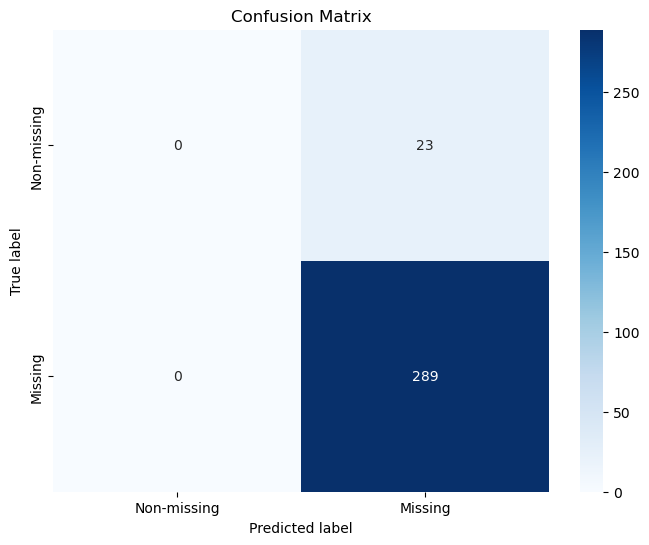

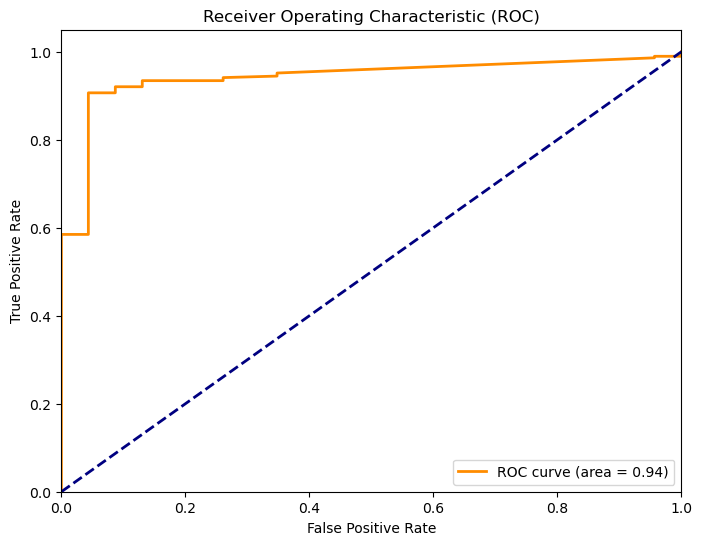


Total execution time: 0:01:09.392631


In [49]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import cv2
from concurrent.futures import ThreadPoolExecutor
import pickle
from datetime import datetime
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns

# Configure GPU with mixed precision for acceleration
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    # Enable mixed precision
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

def load_and_preprocess_image(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32')
        img = preprocess_input(img)
        return img
    except Exception as e:
        print(f"Error processing image {img_path}: {str(e)}")
        return None

def process_batch(image_paths, model, batch_size=64):
    features = []
    valid_paths = []
    
    num_batches = (len(image_paths) + batch_size - 1) // batch_size
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(image_paths))
        batch_paths = image_paths[start_idx:end_idx]
        
        with ThreadPoolExecutor(max_workers=8) as executor:
            processed_images = list(executor.map(load_and_preprocess_image, batch_paths))
        
        batch_images = []
        current_valid_paths = []
        for img, path in zip(processed_images, batch_paths):
            if img is not None:
                batch_images.append(img)
                current_valid_paths.append(path)
        
        if batch_images:
            batch_images = np.array(batch_images)
            batch_features = model(batch_images, training=False).numpy()
            features.extend(batch_features)
            valid_paths.extend(current_valid_paths)
        
        print(f"Processed {len(valid_paths)} images out of {len(image_paths)}", end='\r')
    
    return np.array(features), valid_paths

def perform_randomized_search(X_train, y_train):
    param_distributions = {
        'C': uniform(0.1, 100),
        'kernel': ['linear', 'rbf'],
        'gamma': uniform(0.001, 0.1),
        'class_weight': [None, 'balanced']
    }
    
    svm = SVC(probability=True, random_state=42)
    random_search = RandomizedSearchCV(
        svm,
        param_distributions,
        n_iter=10,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    
    print("Performing randomized search for best parameters...")
    random_search.fit(X_train, y_train)
    
    print("\nBest parameters found:")
    print(random_search.best_params_)

    print(f"\nBest result: {random_search.best_score_:.4f}")
    
    return random_search.best_estimator_

def main():
    start_time = datetime.now()
    print("Execution started:", start_time)
    
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    
    missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/train'
    non_missing_dir = 'C:/Users/acer/Desktop/Missing Child/Missing child finder.v2i.tensorflow/valid'
    
    cache_file = 'cached_features.pkl'
    if os.path.exists(cache_file):
        print("Loading cached features...")
        X, all_paths = load_features(cache_file)
        y = np.array([1] * len([p for p in all_paths if 'train' in p]) +
                     [0] * len([p for p in all_paths if 'valid' in p]))
    else:
        missing_paths = [os.path.join(missing_dir, f) for f in os.listdir(missing_dir) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        non_missing_paths = [os.path.join(non_missing_dir, f) for f in os.listdir(non_missing_dir) 
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        print("\nProcessing missing images...")
        missing_features, valid_missing_paths = process_batch(missing_paths, base_model)
        
        print("\nProcessing non-missing images...")
        non_missing_features, valid_non_missing_paths = process_batch(non_missing_paths, base_model)
        
        X = np.vstack([missing_features, non_missing_features])
        y = np.array([1] * len(valid_missing_paths) + [0] * len(valid_non_missing_paths))
        
        save_features(X, valid_missing_paths + valid_non_missing_paths, cache_file)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    best_svm = perform_randomized_search(X_train_scaled, y_train)
    
    y_pred = best_svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nFinal model accuracy: {accuracy:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=['Non-missing', 'Missing']))
    
    # Plotting the confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-missing", "Missing"], yticklabels=["Non-missing", "Missing"])
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Plotting the ROC curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, best_svm.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
    end_time = datetime.now()
    print(f"\nTotal execution time: {end_time - start_time}")
    
    return base_model, best_svm, scaler

if __name__ == "__main__":
    resnet_model, svm_model, scaler = main()
    
    def predict_new_image(image_path, resnet_model, svm_model, scaler):
        img = load_and_preprocess_image(image_path)
        if img is not None:
            img = np.expand_dims(img, axis=0)
            features = resnet_model(img, training=False).numpy()
            features_scaled = scaler.transform(features)
            prediction = svm_model.predict(features_scaled)
            probability = svm_model.predict_proba(features_scaled)
            return prediction[0], probability[0]
        return None, None


In [53]:
# Saving the models
resnet_model.save('resnet50_model.h5')

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

# Loading the models
loaded_resnet_model = load_model('resnet50_model.h5')

with open('svm_model.pkl', 'rb') as f:
    loaded_svm_model = pickle.load(f)


In [54]:
pip install gradio


  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/64/cb/9bfce732279c48f06c64582f9444422e08d9d48466467d15c2842e3aef44/gradio-5.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for fastapi<1.0,>=0.115.2 from https://files.pythonhosted.org/packages/52/b3/7e4df40e585df024fac2f80d1a2d579c854ac37109675db2b0cc22c0bb9e/fastapi-0.115.6-py3-none-any.whl.metadata
  Obtaining dependency information for ffmpy from https://files.pythonhosted.org/packages/53/5d/65f40bd333463b3230b3a72d93873caaf49b0cbb5228598fafb75fcc5357/ffmpy-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for gradio-client==1.5.2 from https://files.pythonhosted.org/packages/69/ca/4d8ae560144a3e39b2a6d1848a5852c2822624506f9eccf90dabccd004bf/gradio_client-1.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for httpx>=0.24.1 from https://files.pythonhosted.org/packages/2a/39/e50c7c3a983047577ee07d2a9e53faf5a69493943ec3f6a384bdc792deb2/httpx-0.28

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.10.4 which is incompatible.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2024.12.0 which is incompatible.


In [2]:
import gradio as gr
import tensorflow as tf
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the trained ResNet50 model (assuming it's saved as 'resnet50_model.h5')
resnet_model = tf.keras.models.load_model('resnet50_model.h5')

# Load the trained SVM model (assuming it's saved as 'svm_model.pkl')
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Preprocessing function for image input
def preprocess_image(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize the image to the input size of ResNet50
    img = img.astype('float32')
    img = tf.keras.applications.resnet50.preprocess_input(img)  # Preprocess for ResNet50
    return np.expand_dims(img, axis=0)

# Prediction function
def predict(image):
    # Preprocess the image for ResNet50
    img = preprocess_image(image)
    
    # Extract features using ResNet50
    features = resnet_model.predict(img)
    
    # Predict the class using SVM
    prediction = svm_model.predict(features)
    probability = svm_model.predict_proba(features)
    
    if prediction == 1:
        result = "Missing"
    else:
        result = "Not Missing"
    
    # Plot the probability
    fig, ax = plt.subplots()
    ax.bar(['Not Missing', 'Missing'], probability[0])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    ax.set_title('Prediction Probability')
    
    return result, fig

# Gradio interface
iface = gr.Interface(
    fn=predict, 
    inputs=gr.Image(type="numpy"),  # Accept an image input from the user
    outputs=[gr.Text(label="Prediction"), gr.Plot(label="Probability")],  # Output prediction and probability plot
    live=True,  # Optional: If you want to update the result live
    title="Missing Child Finder",  # Title of the app
    description="Upload an image to predict if a child is missing or not."  # Description of the app
)

# Launch the interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args,

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [ ]:
## http://127.0.0.1:7860